___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 

# PART- 1 Data Cleaning

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

import warnings

# Statistics functions
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Settings

In [2]:
# Suppressing a warning 
warnings.filterwarnings("ignore") 

# It is a magic function that renders the figure in the notebook
%matplotlib inline 

# Changing the figure size of a seaborn axes 
sns.set(rc={"figure.figsize": (10, 6)})

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 100)

## Reading scout_car.json file as a dataframe named df

In [4]:
df = pd.read_csv("scout_car_cleaned.csv")

### Creating a copy from df named df_copy

In [5]:
df_copy = df.copy()

## Checking the dataframe with head, tail and sample

In [6]:
# Checking the head of df

df.head()

,url,make_model,short_description,body_type,price,vat,km,prev_owner,type,previous_owners,next_inspection,inspection_new,warranty,full_service,non_smoking_vehicle,first_registration,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,emission_label,gears,hp_kw,next_insp_date,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,consumption_city,consumption_country
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770.0,VAT deductible,56013.0,2.0,Used,2,"06/2021,99 g CO2/km (comb)","Yes,Euro 6",4 (Green),NaN,NaN,2016.0,Black,Metallic,5.0,5.0,Automatic,1422.0,3.0,front,Diesel,99.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN,NaN,66.0,06/2021,Yes,NaN,Cloth,Black,1220.0,3.8,4.3,3.5
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500.0,Price negotiable,80000.0,NaN,Used,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,Red,NaN,3.0,4.0,Automatic,1798.0,4.0,front,Benzine,129.0,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",4 (Green),7.0,141.0,NaN,NaN,NaN,Cloth,Grey,1255.0,5.6,7.1,4.7
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640.0,VAT deductible,83450.0,1.0,Used,1,NaN,NaN,99 g CO2/km (comb),NaN,NaN,2016.0,Black,Metallic,4.0,4.0,Automatic,1598.0,NaN,front,Diesel,99.0,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",4 (Green),NaN,85.0,NaN,NaN,NaN,Cloth,Black,NaN,3.8,4.4,3.4
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500.0,NaN,73000.0,1.0,Used,1,NaN,NaN,NaN,99 g CO2/km (comb),Euro 6,2016.0,Brown,Metallic,3.0,4.0,Automatic,1422.0,3.0,NaN,Diesel,99.0,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",NaN,6.0,66.0,NaN,NaN,NaN,NaN,NaN,1195.0,3.8,4.3,3.5
4,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790.0,NaN,16200.0,1.0,Used,1,NaN,"Yes,109 g CO2/km (comb)",Euro 6,4 (Green),NaN,2016.0,Black,Metallic,5.0,5.0,Automatic,1422.0,3.0,front,Diesel,109.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",NaN,NaN,66.0,NaN,Yes,NaN,Cloth,Black,NaN,4.1,4.6,3.8


In [8]:
# Checking the tail of df

df.tail()

,url,make_model,short_description,body_type,price,vat,km,prev_owner,type,previous_owners,next_inspection,inspection_new,warranty,full_service,non_smoking_vehicle,first_registration,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,emission_label,gears,hp_kw,next_insp_date,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,consumption_city,consumption_country
15914,https://www.autoscout24.com//offers/renault-es...,Renault Espace,Blue dCi 200CV EDC Executive 4Control,Van,39950.0,VAT deductible,NaN,NaN,New,NaN,NaN,NaN,24 months,NaN,NaN,NaN,Grey,Metallic,5.0,5.0,Automatic,1997.0,4.0,front,Diesel,139.0,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",NaN,6.0,147.0,NaN,NaN,24.0,NaN,NaN,1758.0,5.3,6.2,4.7
15915,https://www.autoscout24.com//offers/renault-es...,Renault Espace,"TCe 225 EDC GPF LIM Deluxe Pano,RFK",Van,39885.0,VAT deductible,9900.0,1.0,Used,"1,,7.4 l/100 km (comb),,9.2 l/100 km (city),,6...","01/2022,168 g CO2/km (comb)",NaN,Euro 6,NaN,4 (Green),2019.0,Grey,Metallic,5.0,5.0,Automatic,1798.0,4.0,front,Benzine,168.0,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",NaN,7.0,165.0,01/2022,NaN,NaN,Cloth,NaN,1708.0,7.4,9.2,6.3
15916,https://www.autoscout24.com//offers/renault-es...,Renault Espace,Blue dCi 200 EDC Initiale Paris Leder LED Navi...,Van,39875.0,VAT deductible,15.0,1.0,Pre-registered,"1,139 g CO2/km (comb)",NaN,"Yes,Euro 6d-TEMP",4 (Green),NaN,NaN,2019.0,White,NaN,5.0,7.0,Automatic,1997.0,4.0,front,Diesel,139.0,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",NaN,6.0,146.0,NaN,Yes,NaN,Full leather,Black,NaN,5.3,6.2,4.7
15917,https://www.autoscout24.com//offers/renault-es...,Renault Espace,"Blue dCi 200CV EDC Business , NUOVA DA IMMATRI...",Van,39700.0,VAT deductible,10.0,NaN,Pre-registered,NaN,NaN,NaN,NaN,NaN,NaN,2019.0,Grey,NaN,5.0,7.0,Automatic,1997.0,4.0,front,Diesel,139.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",NaN,6.0,147.0,NaN,NaN,NaN,Part leather,NaN,1758.0,5.3,6.2,4.7
15918,https://www.autoscout24.com//offers/renault-es...,Renault Espace,INITIALE PARIS TCe 225 EDC GPF NAVI SHZ AUX,Van,40999.0,VAT deductible,NaN,1.0,Demonstration,1,NaN,"Yes,153 g CO2/km (comb)",NaN,NaN,NaN,2019.0,Grey,Metallic,5.0,5.0,Automatic,1798.0,4.0,4WD,Benzine,153.0,Euro 6,"Air conditioning,Automatic climate control,Cru...",USB,"Alloy wheels,Touch screen","ABS,Blind spot monitor,Daytime running lights,...",4 (Green),NaN,165.0,NaN,Yes,NaN,Full leather,Brown,1685.0,6.8,8.7,5.7


In [9]:
# Checking the df by taking samples

df.sample(10)

,url,make_model,short_description,body_type,price,vat,km,prev_owner,type,previous_owners,next_inspection,inspection_new,warranty,full_service,non_smoking_vehicle,first_registration,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,emission_label,gears,hp_kw,next_insp_date,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,consumption_city,consumption_country
1370,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,"1.0 TFSI Navi, GRA, Media-Paket",Compact,15440.0,VAT deductible,6240.0,1.0,Used,1,"06/2021,104 g CO2/km (comb)",NaN,Euro 6,4 (Green),NaN,2018.0,Black,NaN,2.0,4.0,Manual,999.0,3.0,front,Benzine,104.0,Euro 6,"Air conditioning,Armrest,Cruise control,Electr...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Voice Control,"ABS,Central door lock,Daytime running lights,D...",NaN,5.0,60.0,06/2021,NaN,NaN,NaN,Black,1110.0,4.4,5.2,3.9
3891,https://www.autoscout24.com//offers/audi-a3-1-...,Audi A3,1.6 Tdi SPBK SPORT restyling AZIENDALI,Sedans,20900.0,VAT deductible,19500.0,NaN,Employee's car,NaN,NaN,NaN,24 months,NaN,NaN,2017.0,Black,Metallic,5.0,5.0,Automatic,NaN,NaN,front,Diesel,NaN,NaN,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock,Daytime run...",NaN,NaN,81.0,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN
9622,https://www.autoscout24.com//offers/opel-corsa...,Opel Corsa,1.4 66kW (90CV) Selective,Other,9600.0,NaN,12066.0,1.0,Used,1,NaN,NaN,120 g CO2/km (comb),Euro 6,NaN,2018.0,Grey,Metallic,5.0,5.0,Manual,1398.0,4.0,NaN,Benzine,120.0,Euro 6,NaN,NaN,NaN,NaN,NaN,5.0,66.0,NaN,NaN,NaN,NaN,NaN,1163.0,5.2,6.9,4.2
13601,https://www.autoscout24.com//offers/renault-cl...,Renault Clio,Clio Estate 1.5 DCI 90cv Business,Station wagon,7900.0,NaN,126000.0,NaN,Used,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,Grey,NaN,5.0,5.0,Manual,1461.0,4.0,NaN,Diesel,NaN,Euro 5,"Air conditioning,Electrical side mirrors,Leath...",NaN,NaN,"ABS,Central door lock,Driver-side airbag,Elect...",NaN,5.0,66.0,NaN,NaN,NaN,NaN,NaN,1121.0,NaN,NaN,NaN
192,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.0 TFSI sport,Compact,17900.0,VAT deductible,10170.0,1.0,Used,1,NaN,"Yes,102 g CO2/km (comb)",Euro 6,4 (Green),NaN,2018.0,Grey,Metallic,5.0,4.0,Automatic,999.0,3.0,front,Benzine,102.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Sport seats,S...","ABS,Central door lock,Daytime running lights,D...",NaN,7.0,70.0,NaN,Yes,NaN,Cloth,Black,NaN,4.6,5.6,4.0
10291,https://www.autoscout24.com//offers/opel-corsa...,Opel Corsa,E 1.2 Selection *Cool & Sound*Onyx Schwarz*,Compact,10680.0,VAT deductible,NaN,NaN,New,NaN,NaN,NaN,NaN,NaN,"5.6 l/100 km (comb),,7.3 l/100 km (city),,4.7 ...",NaN,Black,Metallic,3.0,5.0,Manual,1229.0,4.0,front,Benzine,129.0,Euro 6d-TEMP,"Air conditioning,Hill Holder,Power windows","On-board computer,Radio",NaN,"ABS,Central door lock,Daytime running lights,D...",4 (Green),NaN,51.0,NaN,NaN,NaN,Cloth,Black,NaN,5.6,7.3,4.7
9592,https://www.autoscout24.com//offers/opel-corsa...,Opel Corsa,5P B-COLOR 1.4 75CV MT,Sedans,9500.0,VAT deductible,24666.0,NaN,Used,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,Black,NaN,5.0,5.0,Manual,1398.0,4.0,front,Benzine,118.0,Euro 6,"Air conditioning,Electrical side mirrors,Power...","Bluetooth,CD player,Radio,USB","Alloy wheels,Sport package,Sport seats","ABS,Central door lock,Driver-side airbag,Elect...",NaN,5.0,55.0,NaN,NaN,NaN,NaN,NaN,1088.0,5.1,6.7,4.2
13473,https://www.autoscout24.com//offers/renault-cl...,Renault Clio,1.2 LIMITED *Navi*Temp*R&Go*Garantie*,Station wagon,8490.0,NaN,49178.0,2.0,Used,2,NaN,NaN,NaN,126 g CO2/km (comb),Euro 6,2016.0,White,NaN,4.0,5.0,Manual,1149.0,NaN,NaN,Benzine,126.0,Euro 6,"Air conditioning,Cruis

## Checking the summary information of df

In [10]:
# Checking the summary information of df with df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  15919 non-null  object 
 1   make_model           15919 non-null  object 
 2   short_description    15873 non-null  object 
 3   body_type            15859 non-null  object 
 4   price                15919 non-null  float64
 5   vat                  11406 non-null  object 
 6   km                   14895 non-null  float64
 7   prev_owner           9091 non-null   float64
 8   type                 15917 non-null  object 
 9   previous_owners      9279 non-null   object 
 10  next_inspection      3535 non-null   object 
 11  inspection_new       3932 non-null   object 
 12  warranty             9156 non-null   object 
 13  full_service         6230 non-null   object 
 14  non_smoking_vehicle  3460 non-null   object 
 15  first_registration   14322 non-null 

## Checking the null values of df

In [11]:
df.isnull().sum()

url                        0
make_model                 0
short_description         46
body_type                 60
price                      0
vat                     4513
km                      1024
prev_owner              6828
type                       2
previous_owners         6640
next_inspection        12384
inspection_new         11987
warranty                6763
full_service            9689
non_smoking_vehicle    12459
first_registration      1597
body_color               597
paint_type              5772
nr_of_doors              212
nr_of_seats              977
gearing_type               0
displacement_cc          496
cylinders               5680
drive_chain             6858
fuel                       0
co_2_emission           2436
emission_class          3628
comfort_convenience      920
entertainment_media     1374
extras                  2962
safety_security          982
emission_label         11974
gears                   4712
hp_kw                     88
next_insp_date

## Checking the duplicated values in df

In [1539]:
df.duplicated

# As it is seen below, there is not any duplicated values.

<bound method DataFrame.duplicated of                                                      url      make_model  \
0      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
1      https://www.autoscout24.com//offers/audi-a1-1-...         Audi A1   
2      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
3      https://www.autoscout24.com//offers/audi-a1-1-...         Audi A1   
4      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
...                                                  ...             ...   
15914  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15915  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15916  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15917  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15918  https://www.autoscout24.com//offers/renault-es...  Renault Espace   

                                       short_desc

# PART- 2 `( Handling With Missing Values )`

## url column

In [19]:
df[df.body_color.isnull()][["url", "body_color"]]

,url,body_color
70,https://www.autoscout24.com//offers/audi-a1-sp...,NaN
122,https://www.autoscout24.com//offers/audi-a1-sp...,NaN
150,https://www.autoscout24.com//offers/audi-a1-sp...,NaN
195,https://www.autoscout24.com//offers/audi-a1-sp...,NaN
198,https://www.autoscout24.com//offers/audi-a1-a1...,NaN
...,...,...
15690,https://www.autoscout24.com//offers/renault-es...,NaN
15785,https://www.autoscout24.com//offers/renault-es...,NaN
15849,https://www.autoscout24.com//offers/renault-es...,NaN
15854,https://www.autoscout24.com//offers/renault-es...,NaN


In [22]:
df.url[198]

'https://www.autoscout24.com//offers/audi-a1-a1-s1-1-6-tdi-116-cv-s-tronic-diesel-40d8d475-a023-493f-b313-d066e569e8d6'

In [27]:
color_list = list(df.body_color.dropna().unique())
color_list

['Black',
 'Red',
 'Brown',
 'White',
 'Grey',
 'Silver',
 'Blue',
 'Beige',
 'Violet',
 'Yellow',
 'Green',
 'Bronze',
 'Orange',
 'Gold']

In [28]:
def findcolor(x):
    if any(i in x for i in color_list):
        return True
    else:
        return False

In [31]:
df.url.apply(findcolor).sum()

0

In [ ]:
'https://www.autoscout24.com//offers/audi-a1-a1-s1-1-6-tdi-116-cv-s-tronic-diesel-40d8d475-a023-493f-b313-d066e569e8d6'

In [33]:
findcolor(df.url[0])

False

In [38]:
df.body_color.dropna().apply(findcolor)

0        True
1        True
2        True
3        True
4        True
         ... 
15914    True
15915    True
15916    True
15917    True
15918    True
Name: body_color, Length: 15322, dtype: bool

In [40]:
## Diğer kolonları dolduracak bilgi olmadığı tespit edildi. Düşülecek.

df.drop(columns="url", inplace=True)

In [41]:
df.shape

(15919, 42)

In [39]:
missing_value_col = []
[missing_value_col.append(i) for i in df.columns if any(df[i].isnull())]
missing_value_col

['short_description',
 'body_type',
 'vat',
 'km',
 'prev_owner',
 'type',
 'previous_owners',
 'next_inspection',
 'inspection_new',
 'warranty',
 'full_service',
 'non_smoking_vehicle',
 'first_registration',
 'body_color',
 'paint_type',
 'nr_of_doors',
 'nr_of_seats',
 'displacement_cc',
 'cylinders',
 'drive_chain',
 'co_2_emission',
 'emission_class',
 'comfort_convenience',
 'entertainment_media',
 'extras',
 'safety_security',
 'emission_label',
 'gears',
 'hp_kw',
 'next_insp_date',
 'insp_new',
 'warranty_month',
 'upholstery_type',
 'upholstery_color',
 'weight_kg',
 'consumption_comb',
 'consumption_city',
 'consumption_country']

## body_type

In [44]:
df.body_type.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [47]:
df.groupby("make_model")["body_type"].value_counts(dropna=False)

make_model      body_type    
Audi A1         Sedans           1538
                Compact          1039
                Station wagon      21
                Other              13
                Coupe               2
                Van                 1
Audi A2         Off-Road            1
Audi A3         Sedans           2598
                Station wagon     282
                Compact           182
                Other              16
                Convertible         8
                NaN                 7
                Coupe               4
Opel Astra      Station wagon    1211
                Sedans           1053
                Compact           185
                Other              67
                NaN                 7
                Coupe               2
                Off-Road            1
Opel Corsa      Compact          1230
                Sedans            875
                Other              87
                Coupe              13
                Tran

In [50]:
df.groupby("make_model")["body_type"].apply(list)

make_model
Audi A1           [Sedans, Sedans, Sedans, Sedans, Sedans, Sedan...
Audi A2                                                  [Off-Road]
Audi A3           [Convertible, Sedans, Sedans, Sedans, Sedans, ...
Opel Astra        [Station wagon, Station wagon, Station wagon, ...
Opel Corsa        [Sedans, Sedans, Sedans, Compact, Compact, Com...
Opel Insignia     [Station wagon, Sedans, Station wagon, Station...
Renault Clio      [Compact, Station wagon, Sedans, Station wagon...
Renault Duster    [Off-Road, Off-Road, Off-Road, Off-Road, Off-R...
Renault Espace    [nan, Station wagon, Transporter, Van, Van, Tr...
Name: body_type, dtype: object

In [53]:
df.body_type.mode()

0    Sedans
dtype: object

In [52]:
df.groupby("make_model")["body_type"].apply(lambda x: x.mode()[0])

make_model
Audi A1                  Sedans
Audi A2                Off-Road
Audi A3                  Sedans
Opel Astra        Station wagon
Opel Corsa              Compact
Opel Insignia     Station wagon
Renault Clio             Sedans
Renault Duster         Off-Road
Renault Espace              Van
Name: body_type, dtype: object

In [46]:
df.groupby("make_model")["body_type"].describe()

,count,unique,top,freq
make_model,,,,
Audi A1,2614,6,Sedans,1538
Audi A2,1,1,Off-Road,1
Audi A3,3090,6,Sedans,2598
Opel Astra,2519,6,Station wagon,1211
Opel Corsa,2217,7,Compact,1230
Opel Insignia,2595,7,Station wagon,1611
Renault Clio,1824,8,Sedans,918
Renault Duster,34,1,Off-Road,34
Renault Espace,965,8,Van,777


In [54]:
# fill null values with modeof each group by grouping data according to make_model

df["body_type"] = df.groupby("make_model")["body_type"].apply(lambda x: x.fillna(x.mode()[0]))

## vat column

In [56]:
df.vat.value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

In [57]:
df.groupby("make_model").vat.describe()

,count,unique,top,freq
make_model,,,,
Audi A1,1855,2,VAT deductible,1774
Audi A2,1,1,VAT deductible,1
Audi A3,2310,2,VAT deductible,2209
Opel Astra,1873,2,VAT deductible,1828
Opel Corsa,1648,2,VAT deductible,1607
Opel Insignia,2030,2,VAT deductible,1980
Renault Clio,1058,2,VAT deductible,984
Renault Duster,16,1,VAT deductible,16
Renault Espace,615,2,VAT deductible,581


In [59]:
df.groupby("make_model").vat.value_counts(dropna=False)

make_model      vat             
Audi A1         VAT deductible      1774
                NaN                  759
                Price negotiable      81
Audi A2         VAT deductible         1
Audi A3         VAT deductible      2209
                NaN                  787
                Price negotiable     101
Opel Astra      VAT deductible      1828
                NaN                  653
                Price negotiable      45
Opel Corsa      VAT deductible      1607
                NaN                  571
                Price negotiable      41
Opel Insignia   VAT deductible      1980
                NaN                  568
                Price negotiable      50
Renault Clio    VAT deductible       984
                NaN                  781
                Price negotiable      74
Renault Duster  NaN                   18
                VAT deductible        16
Renault Espace  VAT deductible       581
                NaN                  376
                Price ne

In [61]:
df.groupby("vat").price.describe()

,count,mean,std,min,25%,50%,75%,max
vat,,,,,,,,
Price negotiable,426.0,16097.152582,6345.227414,6250.0,11900.0,15449.5,18967.5,57400.0
VAT deductible,10980.0,18708.520128,7490.561251,4990.0,13490.0,17850.0,22720.0,74600.0


In [63]:
# fill null values with Unknown

df.vat.fillna("Unknown", inplace=True)

In [64]:
df.groupby("vat").price.describe()

,count,mean,std,min,25%,50%,75%,max
vat,,,,,,,,
Price negotiable,426.0,16097.152582,6345.227414,6250.0,11900.0,15449.5,18967.5,57400.0
Unknown,4513.0,16525.991137,6957.862374,13.0,11100.0,15500.0,19950.0,64900.0
VAT deductible,10980.0,18708.520128,7490.561251,4990.0,13490.0,17850.0,22720.0,74600.0


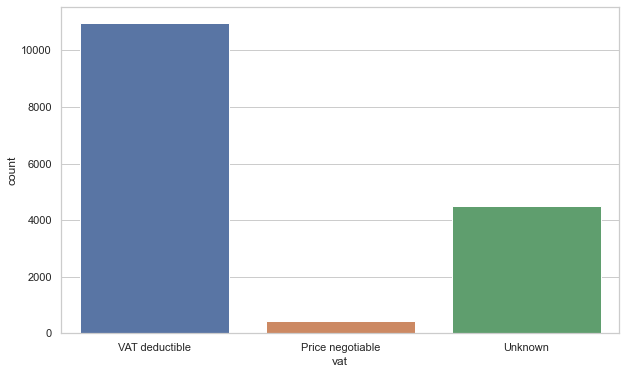

In [68]:
sns.countplot(x=df.vat);

<AxesSubplot:xlabel='vat', ylabel='price'>

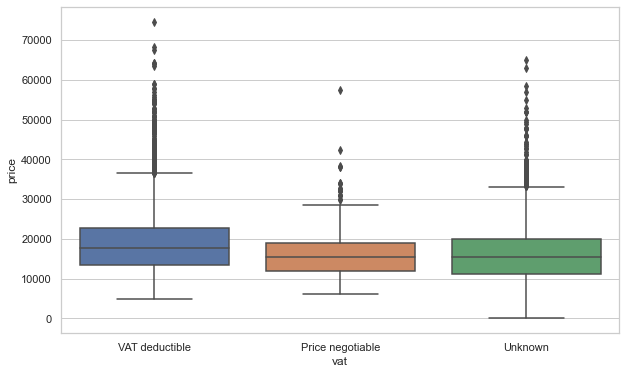

In [69]:
sns.boxplot(x="vat", y="price", data=df)

# PART- 3 `( Handling With Outliers )`

# Final Step (Checking final situation of data via graphs)

## Export dataframe to csv file (without dummy)

In [ ]:
df.to_csv("final_scout_not_dummy.csv", index=False)

# Dummy Operation

## Export dataframe to csv file (dummy)

In [ ]:
df_dummied.to_csv("final_scout_dummy.csv", index=False)